Select members of M3 using Proper Motion

In [1]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt
# fits file-handling
from astropy.io import fits
# power-law colorbar
import matplotlib as mpl

In [2]:
# File from Gaia Archive
hdu = fits.open('Messier3_Gaia.fits.gz')

In [3]:
data = hdu[1].data

In [4]:
def sample(data, sel=None):
    """
        Samples the data at given indices, and returns the filtered data
    """
    global ra, dec, plx, e_plx, pmra, pmdec, g, bp_rp
    try:
        if sel==None:
            sel = np.ones(len(data), dtype='bool')
    except:
        pass
    data = data[sel]
    ra = data['ra']
    dec = data['dec']
    plx = data['parallax']
    e_plx = data['parallax_error']
    pmra = data['pmra']
    pmdec = data['pmdec']
    g = data['phot_g_mean_mag']
    bp_rp = data['bp_rp']
    return data

In [5]:
data = sample(data)
print(f'The sample without any data selection has {data.size} stars')

The sample without any data selection has 37273 stars


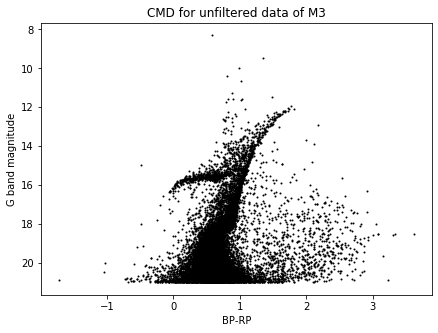

In [6]:
# Construct a Colour Magnitude Diagram
def make_CMD(title='CMD for M3', scale_color=False):
    plt.figure(figsize=(7,5))
    if scale_color:
        s = 1e6*10**(-g/2.5)
    else:
        s=1
    plt.scatter(bp_rp, g, s=s, color='k')
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel('BP-RP')
    plt.ylabel('G band magnitude')

make_CMD('CMD for unfiltered data of M3')

In [7]:
sel_pmra = np.isnan(pmra)
sel_pmdec = np.isnan(pmdec)
sel_mag = np.isnan(g)
sel_col = np.isnan(bp_rp)
sel_plx = np.isnan(plx)

sel_good_data = sel_pmra|sel_pmdec|sel_mag|sel_col|sel_plx
data = sample(data, ~sel_good_data)
print(f'The sample after filtering blank values has {data.size} stars')

The sample after filtering blank values has 21752 stars


In [8]:
sel_plx = plx/e_plx > 1
data = sample(data, sel_plx)
print(f'The sample after filtering bad parallaxes has {data.size} stars')

The sample after filtering bad parallaxes has 5954 stars


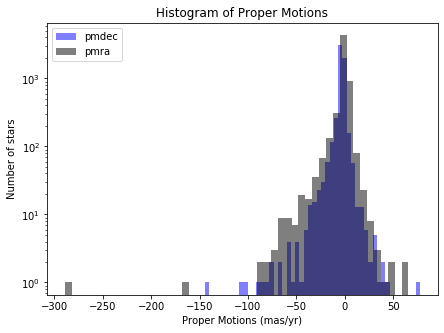

In [9]:
def make_pm_histogram():
    plt.figure(figsize=(7,5))
    plt.hist(pmdec, bins=50, alpha=0.5, color='b', label='pmdec');
    plt.hist(pmra, bins=50, alpha=0.5, color='k', label='pmra');
    plt.yscale('log')
    plt.title('Histogram of Proper Motions')
    plt.xlabel('Proper Motions (mas/yr)')
    plt.ylabel('Number of stars')
    plt.legend(loc=2)

make_pm_histogram()

In [10]:
sel_pmra = (pmra>-6)&(pmra<6)
sel_pmdec = (pmdec>-7)&(pmdec<2)
sel_pm = sel_pmra&sel_pmdec
data = sample(data, sel_pm)
print(f'The sample after filtering PM has {data.size} stars')

The sample after filtering PM has 4798 stars


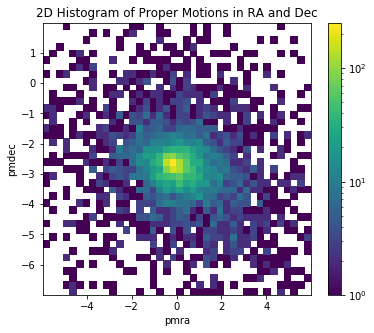

In [11]:
def make_pm_histogram2d():
    norm = mpl.colors.LogNorm()
    plt.figure(figsize=(6,5))
    h = plt.hist2d(pmra, pmdec, bins=(40,40), norm=norm)
    plt.title('2D Histogram of Proper Motions in RA and Dec')
    plt.xlabel('pmra')
    plt.ylabel('pmdec')
    plt.colorbar();

make_pm_histogram2d()

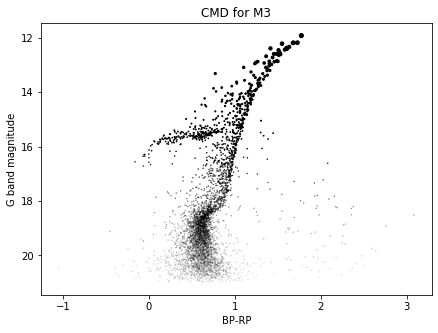

In [12]:
make_CMD(scale_color=True)

In [13]:
s = 1e6*10**(-g/2.5)

Text(0, 0.5, 'dec')

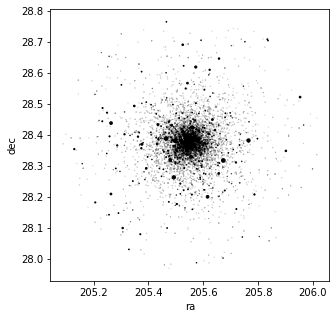

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(ra, dec, s=s, color='k')
plt.xlabel('ra')
plt.ylabel('dec')

In [15]:
dist_dec = dec-np.median(dec)
dist_ra = (ra-np.median(ra))*np.cos(np.deg2rad(dec))

In [16]:
r = np.linalg.norm([dist_ra, dist_dec], axis=0)

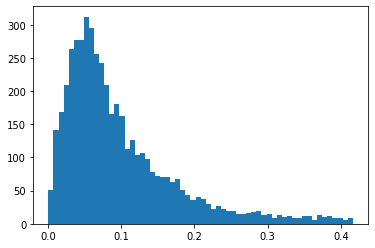

In [17]:
plt.hist(r, bins=60);

In [18]:
pm_r = np.linalg.norm([pmra-np.median(pmra), pmdec-np.median(pmdec)], axis=0)

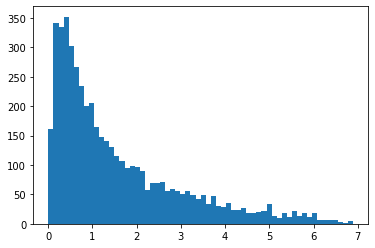

In [19]:
plt.hist(pm_r, bins=60);

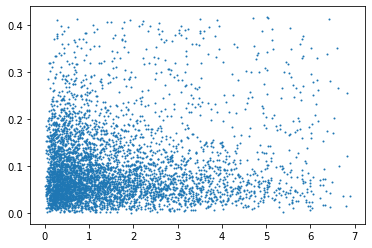

In [20]:
plt.scatter(pm_r, r, s=1)

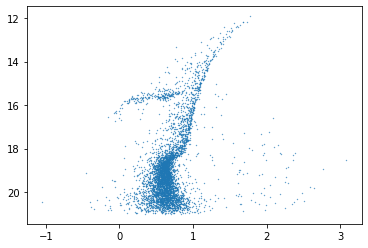

In [22]:
plt.scatter(bp_rp, g, s=0.1)
plt.gca().invert_yaxis()